# Prediction of medical cost based on age using gradient descent

First of all, we are going to import the necessary libraries:

- **Pandas**: to handle and manipulate the dataset.
- **NumPy**: to perform numerical operations and array manipulations.
- **Matplotlib**: to visualize the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will load the insurance dataset ([link](https://www.kaggle.com/datasets/mirichoi0218/insurance)) from a CSV file and visualize head.

In [2]:
df = pd.read_csv("../../datasets/insurance.csv")

Let's visualize the charges over age
to understand trends and patterns in the dataset.

Text(0, 0.5, 'Charges in $')

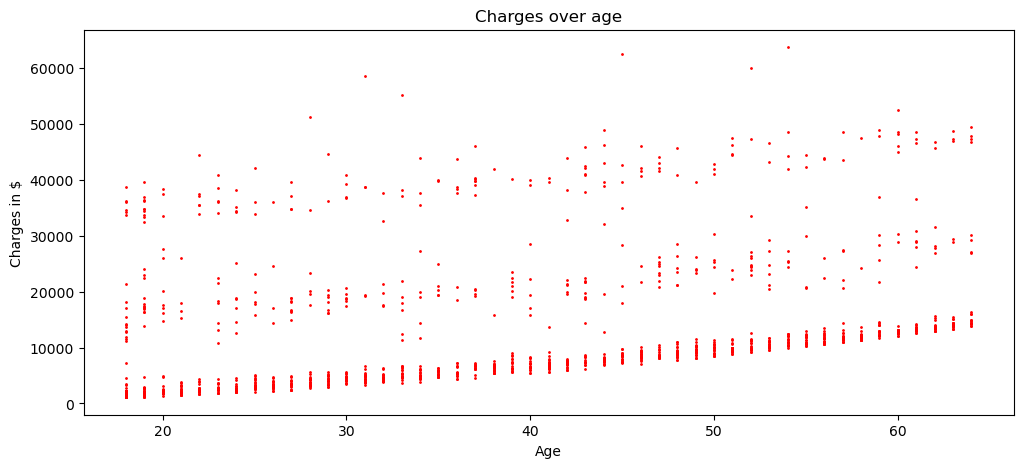

In [3]:
x_train = df["age"]
y_train = df["charges"]

plt.figure(figsize=(12,5))
plt.scatter(x_train, y_train, color='red', s=1)
plt.title('Charges over age')
plt.xlabel('Age')
plt.ylabel('Charges in $')

Now we are going to implement the Gradiend Descent Algorithm.

In [4]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [5]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Data, m examples 
      y (ndarray): target values
      w, b (scalar) : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [6]:
import copy
import math

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray)  : Data, m examples 
      y (ndarray)  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

Now we compute the gradient using the dataset and construct the prediction      

In [7]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1e-3
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.18e+08  dj_dw: -5.711e+05, dj_db: -1.327e+04   w:  5.711e+02, b: 1.32704e+01
Iteration 1000: Cost 6.72e+07  dj_dw:  7.244e+00, dj_db: -3.204e+02   w:  3.214e+02, b: 3.47144e+02
Iteration 2000: Cost 6.71e+07  dj_dw:  6.466e+00, dj_db: -2.860e+02   w:  3.146e+02, b: 6.50025e+02
Iteration 3000: Cost 6.70e+07  dj_dw:  5.771e+00, dj_db: -2.553e+02   w:  3.085e+02, b: 9.20361e+02
Iteration 4000: Cost 6.69e+07  dj_dw:  5.151e+00, dj_db: -2.278e+02   w:  3.030e+02, b: 1.16165e+03
Iteration 5000: Cost 6.69e+07  dj_dw:  4.597e+00, dj_db: -2.034e+02   w:  2.982e+02, b: 1.37701e+03
Iteration 6000: Cost 6.69e+07  dj_dw:  4.103e+00, dj_db: -1.815e+02   w:  2.938e+02, b: 1.56923e+03
Iteration 7000: Cost 6.68e+07  dj_dw:  3.662e+00, dj_db: -1.620e+02   w:  2.899e+02, b: 1.74079e+03
Iteration 8000: Cost 6.68e+07  dj_dw:  3.269e+00, dj_db: -1.446e+02   w:  2.865e+02, b: 1.89392e+03
Iteration 9000: Cost 6.68e+07  dj_dw:  2.918e+00, dj_db: -1.291e+02   w:  2.834e+02, b: 2.03060e+03


We define a prediction function base on age

In [8]:
def predicted_medical_charge(x):
    return w_final * x + b_final

Finally we overlay the result function against the data.

Text(0, 0.5, 'Charges in $')

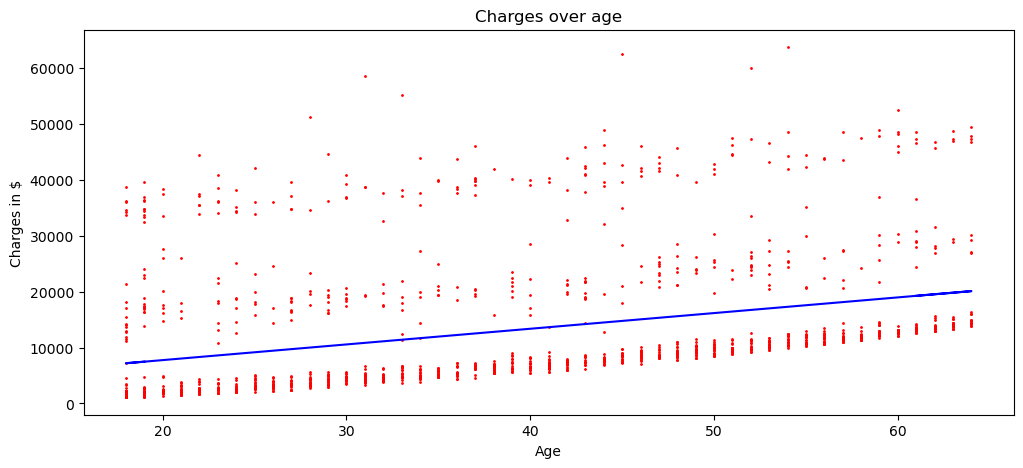

In [9]:
y_pred = w_final * x_train + b_final

plt.figure(figsize=(12,5))
plt.scatter(x_train, y_train, color='red', s=1)
plt.plot(x_train, y_pred, color='blue', label='Predicción')
plt.title('Charges over age')
plt.xlabel('Age')
plt.ylabel('Charges in $')

And now we test and age for example mine that is 23

In [12]:
age = 23
print(f"Your medical charge with {age} years old is {predicted_medical_charge(age).round(2)}$")

Your medical charge with 23 years old is 8607.01$
